In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


In [2]:
data = pd.read_csv('/Users/sazid/Downloads/1.04.+Real-life+example.csv')

In [3]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data = data.drop(['Model'], axis=1)
data = data.drop(['Year'], axis=1)


In [6]:
data = data[data['Price']<=130000]
data = data[data['Mileage']<=470]
data = data[data['EngineV']<7]

In [7]:
data = pd.get_dummies(data, drop_first=True)
data = data.astype(int)

In [8]:
x = data.drop(['Price'], axis=1)
y= data['Price']

In [9]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)

In [11]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
reg.score(x_train,y_train)

0.5727840470678426

In [14]:
y_hat = reg.predict(x_train)

y_hat = pd.DataFrame((y_hat))

train = pd.DataFrame((y_train))

x = pd.DataFrame()
x['Predict']= y_hat.reset_index(drop=True)
x['Train']= train.reset_index(drop=True)
x['Residual']= abs(x['Train']-x['Predict'])
x['%%']= (x['Residual']*100)/x['Train']
x.describe()


,Predict,Train,Residual,%%
count,3155.000000,3155.000000,3155.000000,3155.000000
mean,17934.791442,17934.791442,8066.554876,92.659308
std,14548.557746,19223.146925,9632.180799,183.075831
min,-23999.808336,600.000000,1.906742,0.019457
25%,7698.291121,6999.500000,2630.645010,18.200580
50%,16408.234990,11500.000000,5602.666989,42.325753
75%,27870.371253,21417.500000,10005.494591,86.357075
max,56314.729915,129999.000000,88513.454278,3689.722237


In [15]:
y_hat = reg.predict(x_test)

y_hat = pd.DataFrame((y_hat))

train = pd.DataFrame((y_test))

x = pd.DataFrame()
x['Predict']= y_hat.reset_index(drop=True)
x['Train']= train.reset_index(drop=True)
x['Residual']= abs(x['Train']-x['Predict'])
x['%%']= (x['Residual']*100)/x['Train']
x.describe()

,Predict,Train,Residual,%%
count,789.000000,789.000000,789.000000,789.000000
mean,18211.688668,18333.783270,7848.778105,84.235894
std,14510.252133,19415.607136,8962.511206,143.096726
min,-20457.986687,1100.000000,31.383651,0.221005
25%,8203.111112,7000.000000,2686.841598,18.443130
50%,16043.348600,11300.000000,5527.427733,41.065757
75%,27054.314367,21500.000000,9881.566401,86.300617
max,55555.783994,115000.000000,74514.833990,1870.614267


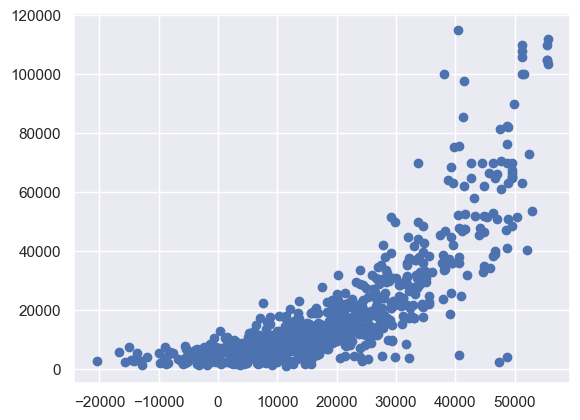

In [16]:
mat.scatter(y_hat, train)